In [2]:
import matplotlib.pyplot as plt
import numpy             as np
import numpy.random      as rd
import pickle            as p

from scipy.linalg import sqrtm
from numpy.linalg import pinv

from sklearn.metrics   import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# EXERCÍCIO 1

In [3]:
# Load do ficheiro
Q1=p.load(open('A46484_Q001_data.p','rb'))
print(Q1.keys())

# Obtenção das classes
y1     = Q1['trueClassTrain']
y2     = Q1['trueClassTest']
Xtrain = Q1['Xtrain']
Xtest  = Q1['Xtest']

# Ordenar (o desempate nos neighbors está relacionado com a primeira classe, importa, para ser escolhida a
# classe mais baixa, estarem ordenadas)
idx1     = np.argsort(y1)
y1       = y1[idx1]
Xtrain   = Xtrain[:,idx1]

idx2     = np.argsort(y2)
y2       = y2[idx2]
Xtest    = Xtest[:,idx2]


dict_keys(['trueClass', 'trueClassTrain', 'Xtrain', 'trueClassTest', 'Xtest'])


In [4]:
def metricaDist(x,y):
    dif = (x-y)
    m = np.asarray([[1,-2],[1,1]])
    return np.dot(np.dot(dif.T,m),dif)

k = 13
knn = KNeighborsClassifier(n_neighbors=k,metric=metricaDist).fit(Xtrain.T,y1)
y2e  = knn.predict(Xtest.T)

MC = confusion_matrix(y2,y2e)
print('Matriz de Confusão \n', MC)

# Colunas > Classes estimadas   0, 1, 2, 3 e 4
#  Linhas > Classes verdadeiras 0, 1, 2, 3 e 4
# C:: Classe Verdadeira
# E:: Classe Estimada

# Corretos
C0E0 = MC[0,0]
C1E1 = MC[1,1]
C2E2 = MC[2,2]
C3E3 = MC[3,3]
C4E4 = MC[4,4]

# Erros
C0E1 = MC[0,1]
C0E2 = MC[0,2]
C0E3 = MC[0,3]
C0E4 = MC[0,4]

C1E0 = MC[1,0]
C1E2 = MC[1,2]
C1E3 = MC[1,3]
C1E4 = MC[1,4]

C2E0 = MC[2,0]
C2E1 = MC[2,1]
C2E3 = MC[2,3]
C2E4 = MC[2,4]

C3E0 = MC[3,0]
C3E1 = MC[3,1]
C3E2 = MC[3,2]
C3E4 = MC[3,4]

C4E0 = MC[4,0]
C4E1 = MC[4,1]
C4E2 = MC[4,2]
C4E3 = MC[4,3]

Matriz de Confusão 
 [[188   5   0   2   7]
 [  0 200   0   0   2]
 [  0   0 146   0   0]
 [  1   3   0 177   8]
 [  4  32   0   5 197]]


In [5]:
#A)
print("i) O numero de pontos da classe w2 classificados na classe w2 é 146: ", C2E2)#V
print("ii) O numero de pontos da classe w4 classificados na classe w3 e 17: ", C4E3)#F

#RESPOSTA i)

i) O numero de pontos da classe w2 classificados na classe w2 é 146:  146
ii) O numero de pontos da classe w4 classificados na classe w3 e 17:  5


In [6]:
#B)
print("O numero total de erros é de 77: ", np.sum(y2!=y2e)) #F
print("O numero de acertos na classe w3 é de 179: ", C3E3) #F

#RESPOSTA IV)

O numero total de erros é de 77:  69
O numero de acertos na classe w3 é de 179:  177


In [7]:
QuestDic=p.load(open('A46484_Ficha2_Respostas.p','rb'))
#1A) RESPOSTA i)
#1B) RESPOSTA IV)

QuestDic['Q001'][0,:]=np.array([1,0,0,0])
QuestDic['Q001'][1,:]=np.array([0,0,0,1]) 
print(QuestDic['Q001'])

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]]


# EXERCÍCIO 2

X:
 [[-2 -1 -2 -1  5  5  5  2  2]
 [ 5  7  5  4  5  4  3  4  3]]
X0:
 [[-2 -1 -2 -1]
 [ 5  7  5  4]]
X1:
 [[5 5 5 2 2]
 [5 4 3 4 3]]


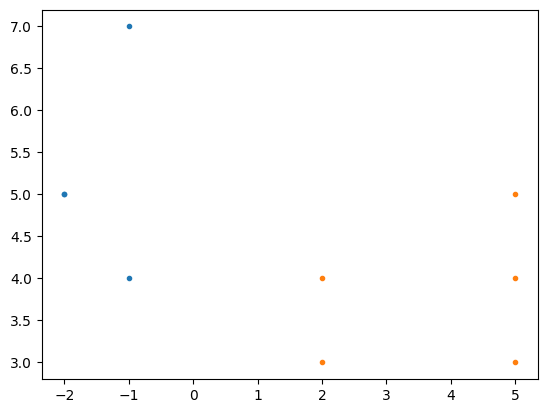

In [8]:
X = np.array([[-2,  -1, -2,  -1,  5,  5,  5,  2,  2],
              [5,  7,  5,  4,  5,  4,  3,  4,  3]])
y = np.array([0,0,0,0,1,1,1,1,1])
X0 = X[:,y==0]
X1 = X[:,y==1]
print('X:\n',  X)
print('X0:\n', X0)
print('X1:\n', X1)

# Médias e matrizes de covariância...
m0 = np.mean(X0, axis=1)
m1 = np.mean(X1, axis=1)
S0 = np.cov(X0)
S1 = np.cov(X1)

# Inverter covariância
S0i = pinv(S0)
S1i = pinv(S1)

plt.plot(X0[0,:], X0[1,:],'.')
plt.plot(X1[0,:], X1[1,:],'.')

In [9]:
#A) Considere que o conjunto X foi classificado usando o classificador de distancia ao centroide com a metrica de distância 
# euclidiana. Considere ainda que w0 corresponde a classe dos negativos e w1 a dos positivos. Para esta alíınea,
# use valoresn inteiros.
D0  = np.sqrt(np.sum((X-m0[:,np.newaxis])**2, axis=0))
D1  = np.sqrt(np.sum((X-m1[:,np.newaxis])**2, axis=0))
Dc  = np.vstack((D0, D1)) 
yec = np.argmin(Dc, axis=0)
MC = confusion_matrix(y, yec)
print('Matriz de Confusão\n', MC)

# Se 0 > Negativo 
#    1 > Positivo
# Tem-se:
#
#        estimado
#          0  1
# real  0 TN FP
#       1 FN TP
TN = MC[0,0]
FP = MC[0,1]
FN = MC[1,0]
TP = MC[1,1]

print('\ni)  "O numero de Verdadeiros Positivos é: 5 ": ', TP) #V
print('ii) "O numero de Verdadeiros Negativos é: 3 ": ', TN) #F

#RESPOSTA i)   

Matriz de Confusão
 [[4 0]
 [0 5]]

i)  "O numero de Verdadeiros Positivos é: 5 ":  5
ii) "O numero de Verdadeiros Negativos é: 3 ":  4


In [10]:
#B) Considere que se pretende classificar novos vetores com o classificador de distancia ao centroide usando a 
# metrica de distância de Manhattan.
Xi   = np.asarray([[-4], [-1]])
Xii  = np.asarray([[-3], [4]])
Xb   = np.hstack((Xi, Xii))
print(Xb)
Xtmp = Xb-m0[:,np.newaxis]
D0   = np.sum(np.abs(Xtmp),axis=0)
Xtmp = Xb-m1[:,np.newaxis]
D1   = np.sum(np.abs(Xtmp),axis=0)
Db   = np.vstack((D0, D1))
yeb  = np.argmin(Db, axis=0)

print('i)  "O vetor x = [-4,-1]T é classificado na classe w0":', yeb[0]) # V
print('ii) "O vetor x = [-3, 4]T é classificado na classe w1":', yeb[1]) # F

#RESPOSTA i)

[[-4 -3]
 [-1  4]]
i)  "O vetor x = [-4,-1]T é classificado na classe w0": 0
ii) "O vetor x = [-3, 4]T é classificado na classe w1": 0


In [11]:
#C) Considere que se pretende classificar novos vetores com o classificador de distancia ao centroide 
# usando a metrica de distãncia de Mahalanobis.
Xi   = np.array([[3], [-1]])
Xii  = np.array([[-1], [-1]])
Xc   = np.hstack((Xi, Xii))
print(Xc)
D0a  = np.sqrt(np.sum((Xc-m0[:,np.newaxis])*np.dot(S0i,Xc-m0[:,np.newaxis]), axis = 0))
D1a  = np.sqrt(np.sum((Xc-m1[:,np.newaxis])*np.dot(S1i,Xc-m1[:,np.newaxis]), axis = 0))
Da   = np.vstack((D0a, D1a))
yea  = np.argmin(Da, axis=0) #classe classificado

print('i)  "O vetor x = [3, -1]T é classificado na classe w1": ', yea[0]) # V
print('ii) "O vetor x = [-1,-1]T é classificado na classe w1": ', yea[1]) # F

#RESPOSTA i)

[[ 3 -1]
 [-1 -1]]
i)  "O vetor x = [3, -1]T é classificado na classe w1":  1
ii) "O vetor x = [-1,-1]T é classificado na classe w1":  0


In [12]:
#D)Considere que o conjunto X foi classificado usando o classificador de distancia ao centroide com a metrica de distância 
#de cosseno.Considere ainda que w0 corresponde a classe dos negativos e w1 à dos positivos.Para esta alíınea, use valores
#inteiros.
Aux0 = np.dot(X.T,m0)
D0 = 1 - Aux0/np.dot(np.sqrt(np.sum(X**2)),np.sqrt(np.sum(m0**2)))
Aux1 = np.dot(X.T,m1)
D1 = 1 - Aux1/np.dot(np.sqrt(np.sum(X**2)),np.sqrt(np.sum(m1**2)))

Dd  = np.vstack((D0, D1)) 
yed = np.argmin(Dd, axis=0) 

MC = confusion_matrix(y, yed)
print('Matriz de Confusão\n', MC)
TN = MC[0,0]
FP = MC[0,1]
FN = MC[1,0]
TP = MC[1,1]

print('i)  "O número de acertos na classe dos positivos é de 3": ', FP+TP) # F
print('ii) "O número de acertos na classe dos negativos é de 4": ', FN+TN) # V

#RESPOSTA ii)

Matriz de Confusão
 [[4 0]
 [0 5]]
i)  "O número de acertos na classe dos positivos é de 3":  5
ii) "O número de acertos na classe dos negativos é de 4":  4


In [13]:
#E)Para esta alínea, arredonde os valores pedidos a 2 casas decimais.
Xtmp     = m0 - m1
Dmedia   = np.sum(np.abs(Xtmp),axis=0)
print('i)  "A distância de Manhattan entre os vetores de média das duas classes é 1.75": ', np.round(Dmedia,2)) # Falsa

Aux = np.dot(m0,m1)
Dmedia = 1 - Aux/np.dot(np.sqrt(np.sum(m0**2)),np.sqrt(np.sum(m1**2)))
print('ii) "A distância de  cosseno  entre os vetores de média das duas classes é 1.77":  ',  np.round(Dmedia,2)) # Falsa

#RESPOSTA iV)

i)  "A distância de Manhattan entre os vetores de média das duas classes é 1.75":  6.75
ii) "A distância de  cosseno  entre os vetores de média das duas classes é 1.77":   0.51


In [14]:
#A) RESPOSTA i) 
#B) RESPOSTA i)
#C) RESPOSTA i)
#D) RESPOSTA ii)
#E) RESPOSTA iV)
QuestDic['Q002'][0,:]=np.array([1,0,0,0])
QuestDic['Q002'][1,:]=np.array([1,0,0,0])
QuestDic['Q002'][2,:]=np.array([1,0,0,0])
QuestDic['Q002'][3,:]=np.array([0,1,0,0])
QuestDic['Q002'][4,:]=np.array([0,0,0,1]) 
print(QuestDic['Q002'])

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


# EXERCÍCIO 3

In [15]:
# Load do ficheiro
Q3=p.load(open('A46484_Q003_data.p','rb'))
print(Q3.keys())

# Obtenção das classes e cálculo da matriz de confusão
y  = Q3['trueClass']
ye = Q3['estClass']
MC = confusion_matrix(y, ye)
print('\nMatriz de Confusão \n', MC)

# Se 0 > Negativo 
#    1 > Positivo
# Tem-se:
#
#        estimado
#          0  1
# real  0 TN FP
#       1 FN TP
TN = MC[0,0]
FP = MC[0,1]
FN = MC[1,0]
TP = MC[1,1]

dict_keys(['trueClass', 'estClass'])

Matriz de Confusão 
 [[1141  139]
 [  30  290]]


In [25]:
#A) Para esta alínea, arredonde os valores pedidos a 1 casa decimal.
print('i)  "A percentagem de acertos da classe dos negativos e de 89.1%:" ', round((TP+TN)/(TN+FP+FN+TP) * 100,1), '%') # 
print('ii) "A percentagem de exemplos da classe dos negativos e de 80.0%": ', round((FP+TN)/(TN+FP+FN+TP) * 100,1), '%') #V

#RESPOSTA ii)

i)  "A percentagem de acertos da classe dos negativos e de 89.1%:"  89.4 %
ii) "A percentagem de exemplos da classe dos negativos e de 80.0%":  80.0 %


In [17]:
#B)Para esta alínea, arredonde os valores pedidos a 3 casas decimais.
precision = TP/(TP+FP)
recall    = TP/(TP+FN)
print(recall)
f_score   = 2*(precision*recall)/(precision+recall)

print('i) "O F-score e: 1.000:" ', np.round(f_score, 3)) #F
print('ii)  "A taxa de re-chamada (recall) e: 0.906:" ', np.round(recall, 3)) #V

#RESPOSTA ii)
    

0.90625
i) "O F-score e: 1.000:"  0.774
ii)  "A taxa de re-chamada (recall) e: 0.906:"  0.906


In [18]:
#C) Para esta alínea, use valores inteiros
print('i)   "O numero de Falsos Positivos é: 223": ', FP) # F
print('ii)  "O numero de Verdadeiros Positivos é: 290":       ', TP) # V
#RESPOSTA ii)

i)   "O numero de Falsos Positivos é: 223":  139
ii)  "O numero de Verdadeiros Positivos é: 290":        290


In [19]:
#A) RESPOSTA ii)
#B) RESPOSTA ii)
#C) RESPOSTA ii)
QuestDic['Q003'][0,:]=np.array([0,1,0,0])
QuestDic['Q003'][1,:]=np.array([0,1,0,0])
QuestDic['Q003'][2,:]=np.array([0,1,0,0])
print(QuestDic['Q003'])

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


# RESULTADOS FINAIS

In [20]:
p.dump(QuestDic,open('A46484_Ficha2_Respostas.p','wb'))
QuestDic=p.load(open('A46484_Ficha2_Respostas.p','rb'))
# Pergunta 1
print('1a):', np.where(QuestDic['Q001'][0,:] == 1)[0][0] + 1)
print('1b):', np.where(QuestDic['Q001'][1,:] == 1)[0][0] + 1)
print()
## Pergunta 2
print('2a):', np.where(QuestDic['Q002'][0,:] == 1)[0][0] + 1)
print('2b):', np.where(QuestDic['Q002'][1,:] == 1)[0][0] + 1)
print('2c):', np.where(QuestDic['Q002'][2,:] == 1)[0][0] + 1)
print('2d):', np.where(QuestDic['Q002'][3,:] == 1)[0][0] + 1)
print('2e):', np.where(QuestDic['Q002'][4,:] == 1)[0][0] + 1)
print()
# Pergunta 3
print('3a):', np.where(QuestDic['Q003'][0,:] == 1)[0][0] + 1)
print('3b):', np.where(QuestDic['Q003'][1,:] == 1)[0][0] + 1)
print('3c):', np.where(QuestDic['Q003'][2,:] == 1)[0][0] + 1)


1a): 1
1b): 4

2a): 1
2b): 1
2c): 1
2d): 2
2e): 4

3a): 2
3b): 2
3c): 2
